### Feature Engineering - Missing Values Day 2

#### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 

It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [6]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [8]:
median_Age=df['Age'].median()

In [9]:
median_Age

28.0

In [10]:
impute_nan(df,"Age",median_Age)

In [11]:
df.sample(10)

,Survived,Age,Fare,Age_median,Age_random
887,1,19.0,30.0000,19.0,19.0
517,0,NaN,24.1500,28.0,29.0
17,1,NaN,13.0000,28.0,50.0
834,0,18.0,8.3000,18.0,18.0
387,1,36.0,13.0000,36.0,36.0
504,1,16.0,86.5000,16.0,16.0
782,0,29.0,30.0000,29.0,29.0
532,0,17.0,7.2292,17.0,17.0
648,0,NaN,7.5500,28.0,21.0
219,0,30.0,10.5000,30.0,30.0


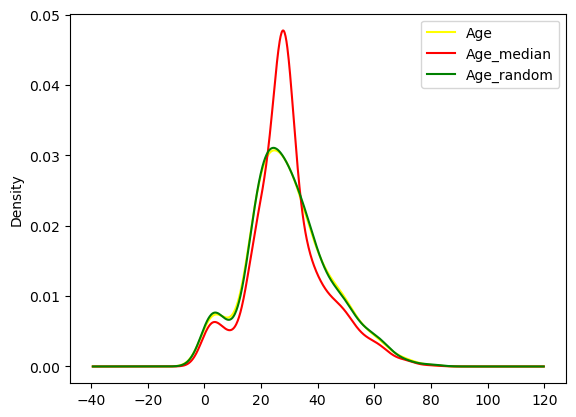

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='yellow')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

#### Advantages

1. Easy To implement

2. There is less distortion in variance

#### Disadvantage

1. Every situation randomness wont work


### 3. Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [13]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [15]:
import warnings  
warnings.filterwarnings('ignore')

df['Age'].fillna(df['Age'].median(),inplace=True)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages

1. Easy to implement

2. Captures the importance of missing values

#### Disadvantages

1. Creating Additional Features(Curse of Dimensionality)

### 4. End of Distribution imputation

It also works for Missing Completely at Random(MCAR).

In [16]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

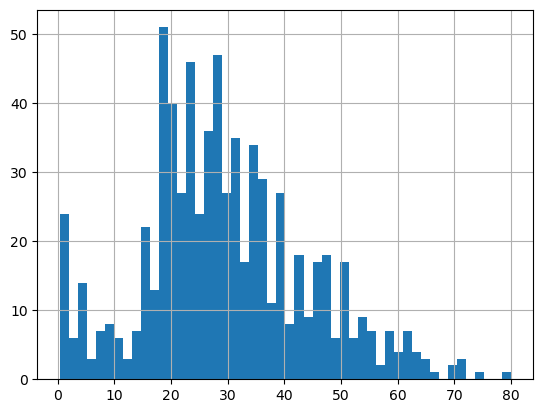

In [17]:
df['Age'].hist(bins=50)

In [18]:
extreme = df['Age'].mean()+3*df['Age'].std()

<Axes: xlabel='Age'>

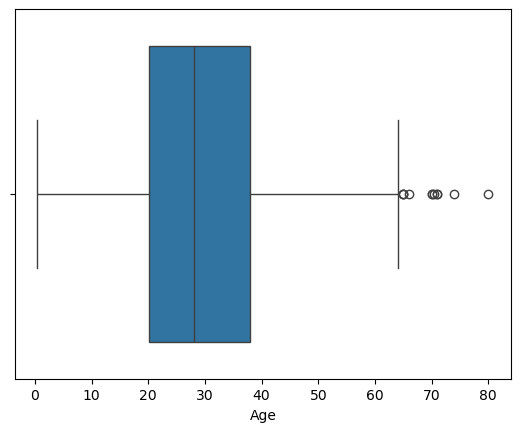

In [19]:
import seaborn as sns
sns.boxplot(x='Age', data=df)

In [20]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [21]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [22]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [24]:
Age_median = df.Age.median()

In [25]:
impute_nan(df,'Age',Age_median,extreme)

In [26]:
df.head()

,Survived,Age,Fare,Age_end_distribution,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<Axes: >

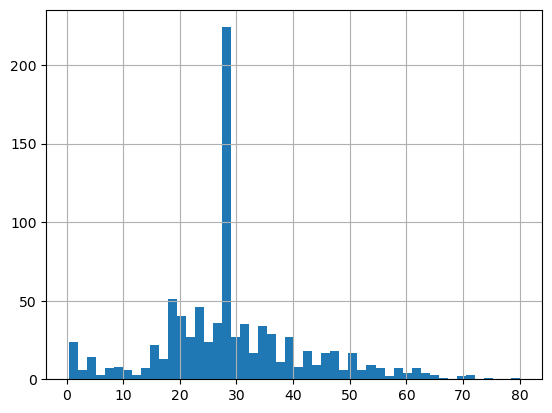

In [27]:
df['Age'].hist(bins=50)

<Axes: >

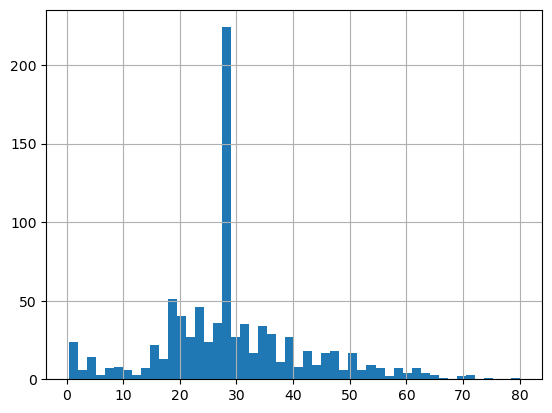

In [28]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

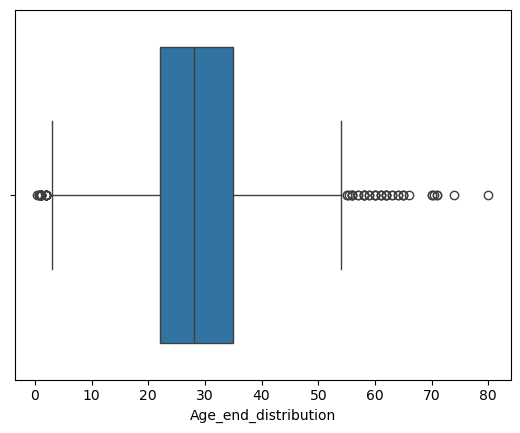

In [29]:
sns.boxplot(x='Age_end_distribution',data=df)